In [1]:
from maelzel.core import *
from pitchtools import *
from maelzel.snd.audiosample import Sample
import numpy as np
import os

In [2]:
cfg = getWorkspace().config
cfg['show.labelStyle'] = 'fontsize=7; placement=above; box=rectangle; family=sans'

In [3]:
cl = Clip(os.path.abspath("../snd/colours-german-male.flac"), pitch="4E", label='colours')
# cl

In [4]:
cfg = CoreConfig(active=True)
cfg['show.respellPitches'] = False
cfg['show.cents'] = False
cfg['chordAdjustGain'] = False
cfg['show.voiceMaxStaves'] = 3

In [5]:
dt = 1/16
times = np.arange(0, cl.durSecs()*0.5, dt)
chords = [cl.chordAt(t, mindb=-55, dur=dt, maxcount=12, ampfactor=10, maxfreq=m2f(200), minfreq=40) or Rest(dt) for t in times]
chain = Chain(chords)

In [6]:
cfg['.quant.debug'] = True
cfg['.quant.debugShowNumRows'] = 3
qs = chain.quantizedScore()

Possible divs: 4896, solutions: 3, best div: (8, 8), error: 0.00050, time: 593.25ms, cache info: 0/1614
Solutions in order of eval: [(4, 11), (7, 8), (8, 8)]
Beat: 0 - 1 (dur: 1)


error,div,slots,info
0.0005,"(8, 8)","[0, 6, 7, 8, 9, 10, 11, 12, 13, 14]","gridError=0, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.0141 (0.001, divPenalty=0.0141, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0742,"(7, 8)","[0, 5, 6, 7, 8, 9, 10, 11, 12, 13]","gridError=0.0742, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.0141 (0.001, divPenalty=0.0141, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2328,"(4, 11)","[0, 3, 4, 4, 5, 7, 8, 10, 11, 12]","gridError=0.233, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.1 (0.007106, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Possible divs: 4896, solutions: 2, best div: (1, 8), error: 0.00035, time: 214.72ms, cache info: 0/1996
Solutions in order of eval: [(1, 11), (1, 8)]
Beat: 1 - 2 (dur: 1)


error,div,slots,info
0.0004,"(1, 8)","[0, 1, 2, 3, 4, 5, 6, 7, 8]","gridError=0, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.01 (0.0007071, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2023,"(1, 11)","[0, 1, 2, 4, 5, 7, 8, 9, 11]","gridError=0.202, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.1 (0.007071, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Possible divs: 4896, solutions: 8, best div: (8, 8), error: 0.00529, time: 90.50ms, cache info: 0/2216
Solutions in order of eval: [(1, 11), (4, 11), (5, 9), (6, 8), (7, 7), (7, 8), (8, 8), (4, 1, 1, 4)]
Beat: 2 - 3 (dur: 1)


error,div,slots,info
0.0053,"(8, 8)","[0, 1, 15]","gridError=0, rhythmComplexity=0.149 (numSyncop=1, numTies=0), divPenalty=0.0141 (0.001, divPenalty=0.0141, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0053,"(4, 1, 1, 4)","[0, 1, 9]","gridError=0, rhythmComplexity=0.149 (numSyncop=1, numTies=0), divPenalty=0.0241 (0.001707, divPenalty=0.0241, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0314,"(7, 8)","[0, 1, 14]","gridError=0.0296, rhythmComplexity=0.149 (numSyncop=1, numTies=0), divPenalty=0.0141 (0.001, divPenalty=0.0141, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Possible divs: 4896, solutions: 6, best div: (8, 8), error: 0.00268, time: 174.06ms, cache info: 2/2894
Solutions in order of eval: [(4, 11), (6, 9), (7, 8), (8, 7), (8, 8), (4, 1, 1, 4)]
Beat: 3 - 4 (dur: 1)


error,div,slots,info
0.0027,"(8, 8)","[0, 1, 2, 3, 4, 15]","gridError=0, rhythmComplexity=0.0745 (numSyncop=1, numTies=0), divPenalty=0.0141 (0.001, divPenalty=0.0141, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0028,"(4, 1, 1, 4)","[0, 1, 2, 3, 4, 9]","gridError=0, rhythmComplexity=0.0745 (numSyncop=1, numTies=0), divPenalty=0.0241 (0.001707, divPenalty=0.0241, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0366,"(8, 7)","[0, 1, 2, 3, 4, 14]","gridError=0.0362, rhythmComplexity=0.0745 (numSyncop=1, numTies=0), divPenalty=0.0141 (0.001, divPenalty=0.0141, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Possible divs: 4896, solutions: 5, best div: (8, 1), error: 0.00035, time: 121.39ms, cache info: 2/3346
Solutions in order of eval: [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]
Beat: 0 - 1 (dur: 1)


error,div,slots,info
0.0004,"(8, 1)","[0, 1, 2, 3, 4, 5, 6, 7, 8]","gridError=0, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.01 (0.0007071, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2188,"(7, 1)","[0, 1, 2, 3, 4, 4, 5, 6, 7]","gridError=0.219, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.01 (0.0007071, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2417,"(6, 1)","[0, 1, 2, 2, 3, 4, 5, 5, 6]","gridError=0.242, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.01 (0.0007071, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Possible divs: 4896, solutions: 6, best div: (8, 1), error: 0.00528, time: 42.45ms, cache info: 2/3411
Solutions in order of eval: [(7,), (8,), (3, 1), (4, 1), (5, 1), (8, 1)]
Beat: 1 - 2 (dur: 1)


error,div,slots,info
0.0053,"(8, 1)","[0, 5, 6]","gridError=0, rhythmComplexity=0.149 (numSyncop=1, numTies=0), divPenalty=0.01 (0.0007071, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0931,"(5, 1)","[0, 3, 4]","gridError=0.0925, rhythmComplexity=0.149 (numSyncop=1, numTies=0), divPenalty=0.01 (0.0007071, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1099,"(3, 1)","[0, 2, 2]","gridError=0.109, rhythmComplexity=0.149 (numSyncop=1, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Possible divs: 4896, solutions: 6, best div: (8, 8), error: 0.00050, time: 125.75ms, cache info: 9/3839
Solutions in order of eval: [(3, 11), (4, 9), (5, 8), (6, 8), (7, 8), (8, 8)]
Beat: 0 - 1 (dur: 1)


error,div,slots,info
0.0005,"(8, 8)","[0, 6, 7, 8, 9, 10, 11]","gridError=0, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.0141 (0.001, divPenalty=0.0141, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0742,"(7, 8)","[0, 5, 6, 7, 8, 9, 10]","gridError=0.0742, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.0141 (0.001, divPenalty=0.0141, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1199,"(6, 8)","[0, 5, 5, 6, 7, 8, 9]","gridError=0.12, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.0141 (0.001, divPenalty=0.0141, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Possible divs: 4896, solutions: 2, best div: (1, 8), error: 0.00035, time: 89.72ms, cache info: 22/3839
Solutions in order of eval: [(1, 11), (1, 8)]
Beat: 1 - 2 (dur: 1)


error,div,slots,info
0.0004,"(1, 8)","[0, 1, 2, 3, 4, 5, 6, 7, 8]","gridError=0, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.01 (0.0007071, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2023,"(1, 11)","[0, 1, 2, 4, 5, 7, 8, 9, 11]","gridError=0.202, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.1 (0.007071, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Possible divs: 4896, solutions: 6, best div: (8, 8), error: 0.00268, time: 110.13ms, cache info: 24/3968
Solutions in order of eval: [(4, 11), (5, 11), (6, 9), (7, 8), (8, 8), (4, 1, 1, 4)]
Beat: 2 - 3 (dur: 1)


error,div,slots,info
0.0027,"(8, 8)","[0, 1, 2, 13, 14, 15]","gridError=0, rhythmComplexity=0.0745 (numSyncop=1, numTies=0), divPenalty=0.0141 (0.001, divPenalty=0.0141, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0028,"(4, 1, 1, 4)","[0, 1, 2, 7, 8, 9]","gridError=0, rhythmComplexity=0.0745 (numSyncop=1, numTies=0), divPenalty=0.0241 (0.001707, divPenalty=0.0241, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0611,"(7, 8)","[0, 1, 2, 12, 13, 14]","gridError=0.0609, rhythmComplexity=0.0745 (numSyncop=1, numTies=0), divPenalty=0.0141 (0.001, divPenalty=0.0141, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Possible divs: 4896, solutions: 4, best div: (4, 1, 1, 1), error: 0.00071, time: 32.61ms, cache info: 24/4066
Solutions in order of eval: [(4, 1), (6, 1), (8, 1), (4, 1, 1, 1)]
Beat: 3 - 4 (dur: 1)


error,div,slots,info
0.0007,"(4, 1, 1, 1)","[0, 1, 2, 3, 4]","gridError=0, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.02 (0.001414, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0032,"(8, 1)","[0, 1, 2, 3, 4]","gridError=0, rhythmComplexity=0.0894 (numSyncop=1, numTies=0), divPenalty=0.01 (0.0007071, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1438,"(6, 1)","[0, 1, 2, 2, 3]","gridError=0.144, rhythmComplexity=0.0894 (numSyncop=1, numTies=0), divPenalty=0.01 (0.0007071, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Possible divs: 4896, solutions: 6, best div: (8, 8), error: 0.00050, time: 190.41ms, cache info: 41/4654
Solutions in order of eval: [(4, 11), (5, 11), (6, 9), (7, 8), (8, 7), (8, 8)]
Beat: 0 - 1 (dur: 1)


error,div,slots,info
0.0005,"(8, 8)","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","gridError=0, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.0141 (0.001, divPenalty=0.0141, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0296,"(8, 7)","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","gridError=0.0296, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.0141 (0.001, divPenalty=0.0141, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2188,"(7, 8)","[0, 1, 2, 3, 4, 4, 5, 6, 7, 8]","gridError=0.219, rhythmComplexity=0 (numSyncop=0, numTies=0), divPenalty=0.0141 (0.001, divPenalty=0.0141, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Possible divs: 4896, solutions: 5, best div: (8, 1), error: 0.00397, time: 42.56ms, cache info: 43/4673
Solutions in order of eval: [(7,), (8,), (4, 1), (8, 1), (1, 4, 1, 1)]
Beat: 1 - 2 (dur: 1)


error,div,slots,info
0.0040,"(8, 1)","[0, 4, 5, 6]","gridError=0, rhythmComplexity=0.112 (numSyncop=1, numTies=0), divPenalty=0.01 (0.0007071, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0040,"(1, 4, 1, 1)","[0, 1, 2, 3]","gridError=0, rhythmComplexity=0.112 (numSyncop=1, numTies=0), divPenalty=0.02 (0.001414, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1096,"(4, 1)","[0, 2, 3, 3]","gridError=0.109, rhythmComplexity=0.112 (numSyncop=1, numTies=0), divPenalty=0.01 (0.0007071, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


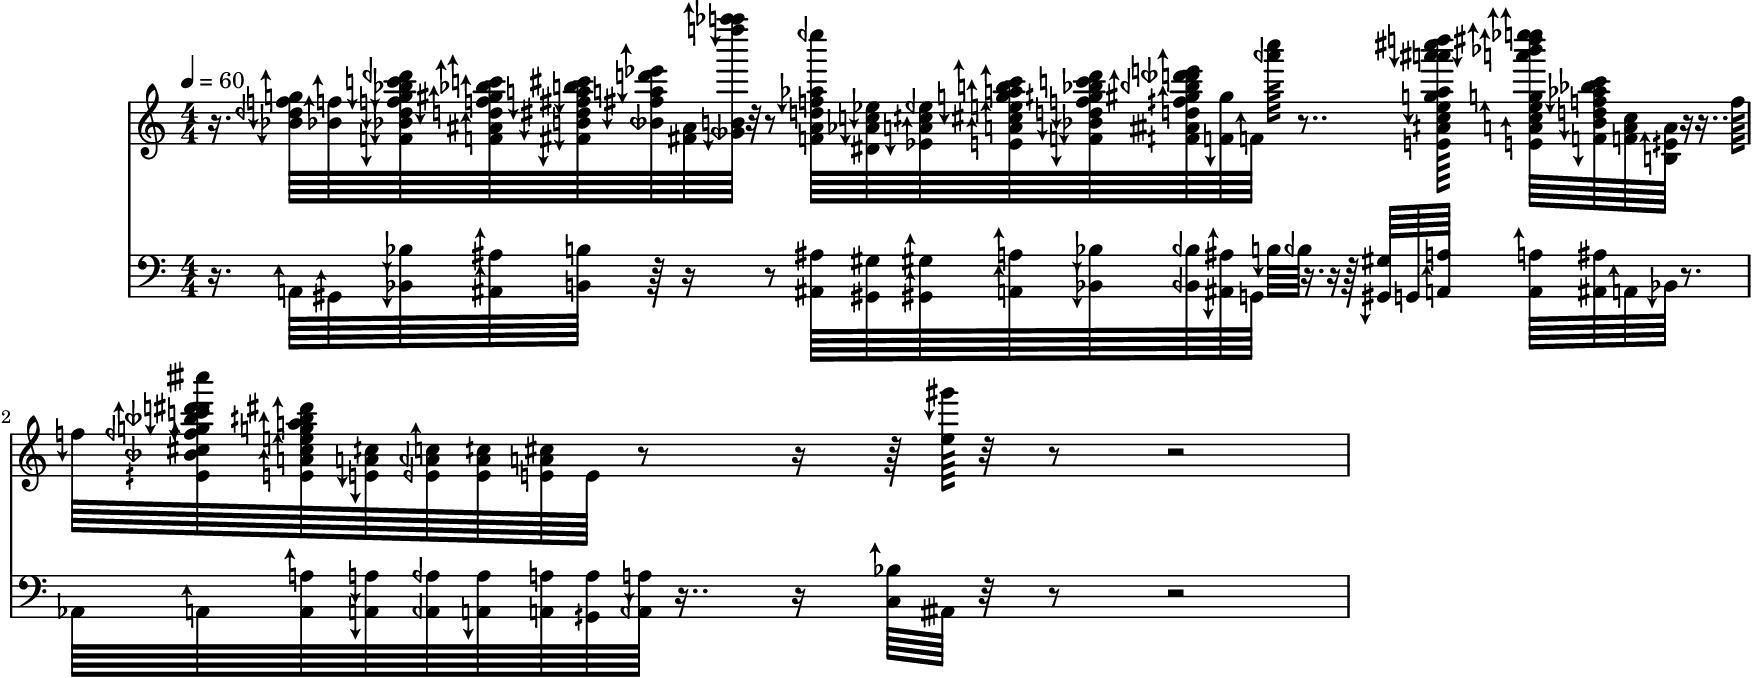

In [7]:
cfg['.quant.debug'] = False
chain.show()

OfflineRenderer(sr=44100)
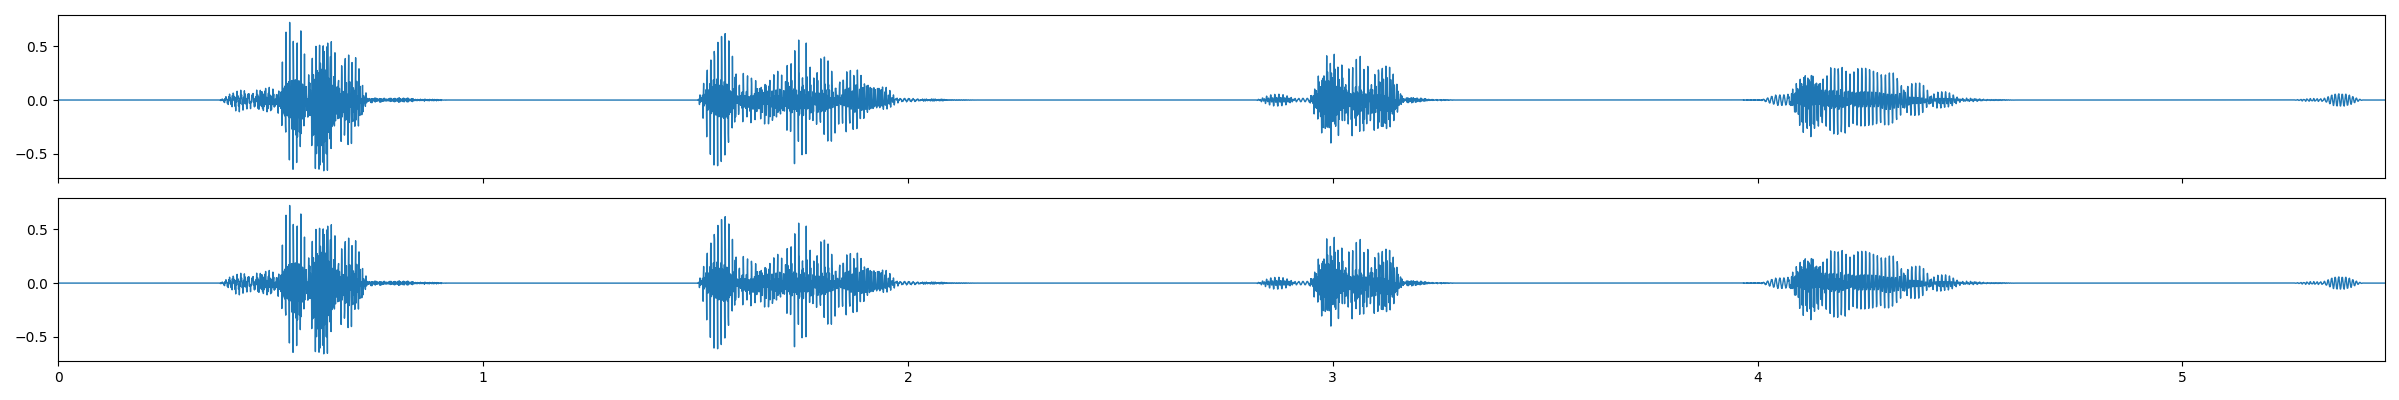

OfflineRenderer(sr=44100)
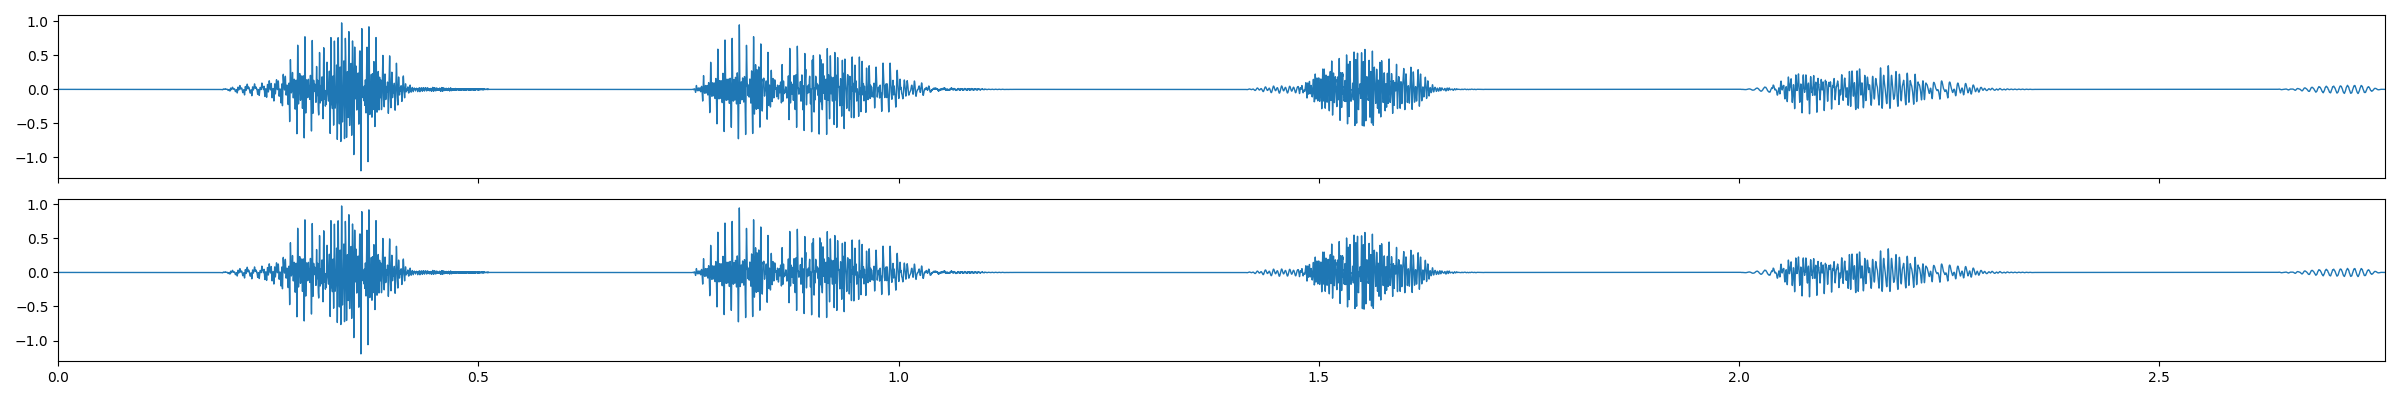

OfflineRenderer(sr=44100)
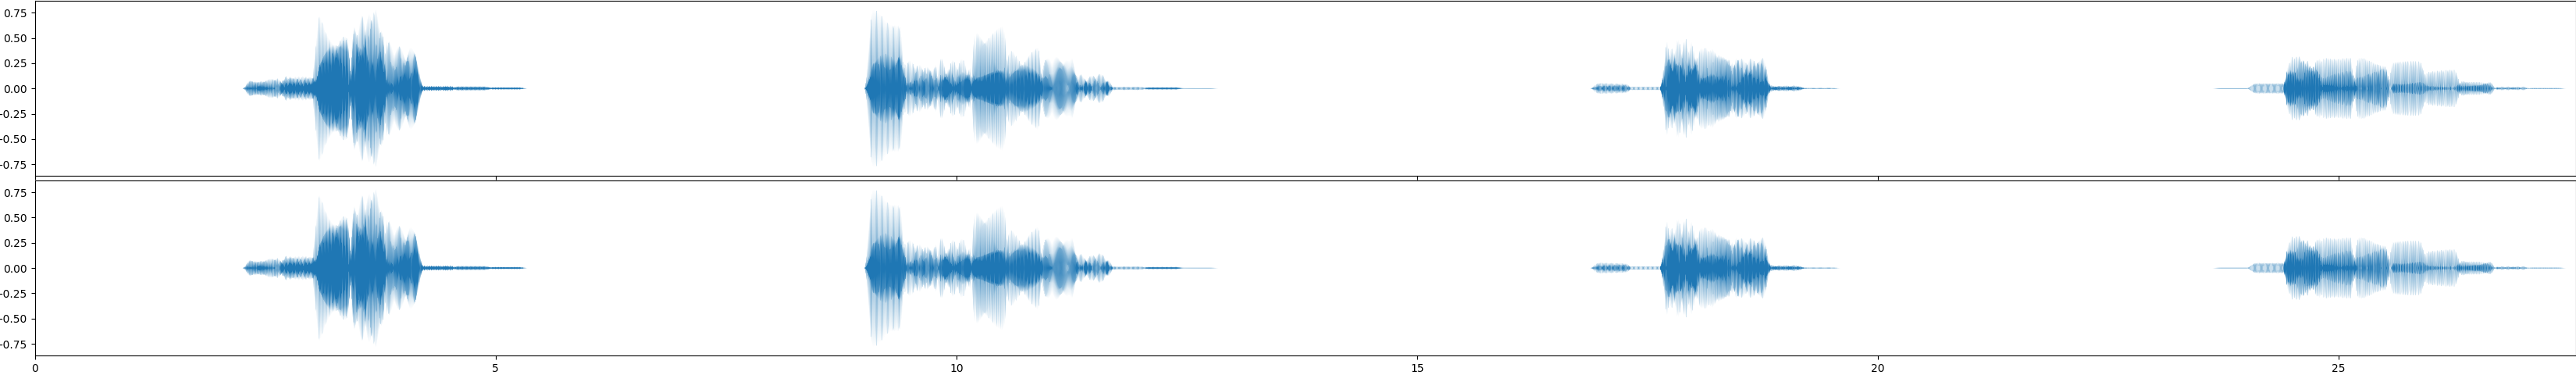

In [8]:

from IPython.display import display
with ScoreStruct(tempo=60):
    display(chain.rec(gain=0.2, instr='sin', fade=(0.05, 0.05), sustain=0.05))

with ScoreStruct(tempo=120):
    display(chain.rec(gain=0.2, instr='sin', fade=(0.05, 0.05), sustain=0.05))

with ScoreStruct(tempo=10) as struct:
    display(chain.rec(gain=0.2, instr='sin', fade=(0.1, 0.1), sustain=0.1, end=struct.beat(30)))

    

OfflineRenderer(sr=44100)
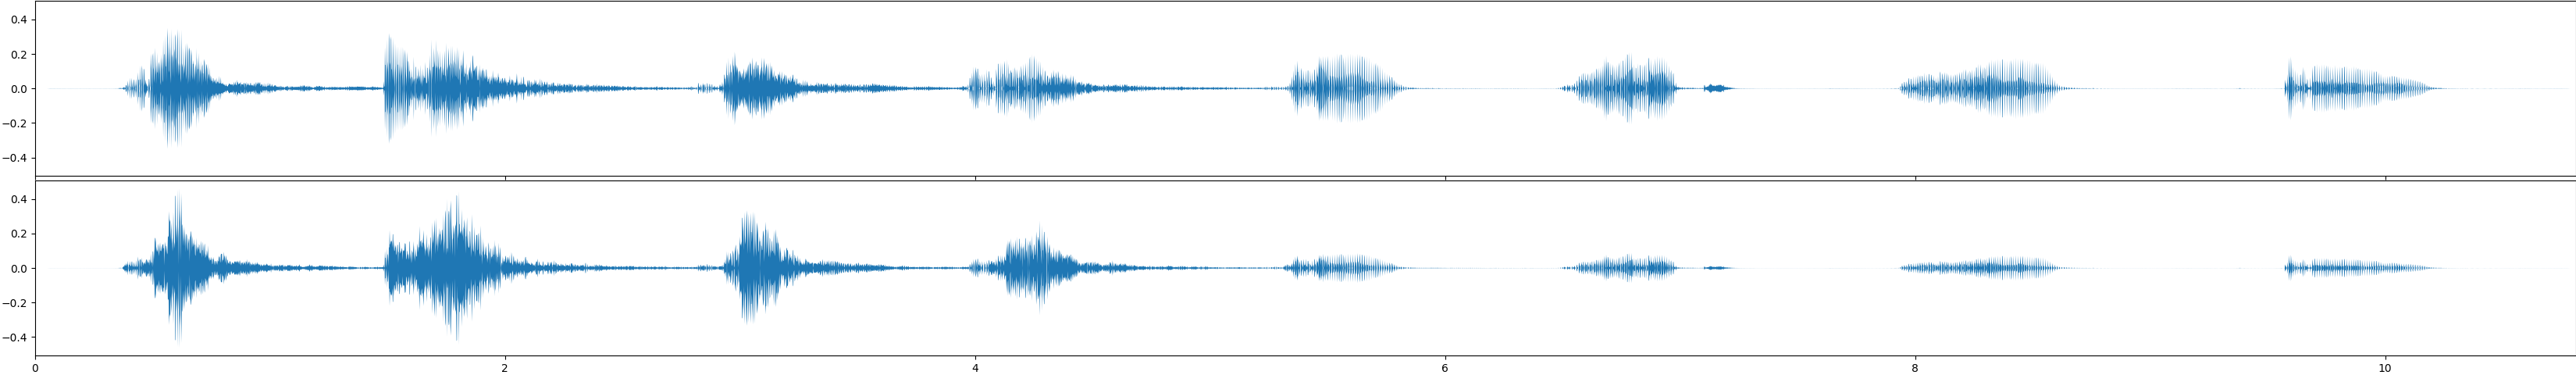

In [8]:
with render(endtime=chain.durSecs() + 1) as r:
    chain.play(gain=1.2, instr='.piano', fade=(0., 0.15), sustain=0.15, position=0.75, kwet=0.9)
    cl.play(position=0.25, gain=0.5, delay=0.05)
r

Chain([R:1/16♩, R:1/16♩, R:1/16♩, R:1/16♩, R:1/16♩, R:1/16♩, ‹2A,4Bb,5Db,5F,5G:0.0625♩›, ‹2Ab,4Bb,5F:0.0625♩›, ‹2Bb,3Bb,4F,4Bb,5D,5F,5G,5Bb,6C,6D:0.0625♩›, ‹2Bb,3Bb,4F,4Bb,5D,5F,5Ab,5Bb,6C:0.0625♩›, …])
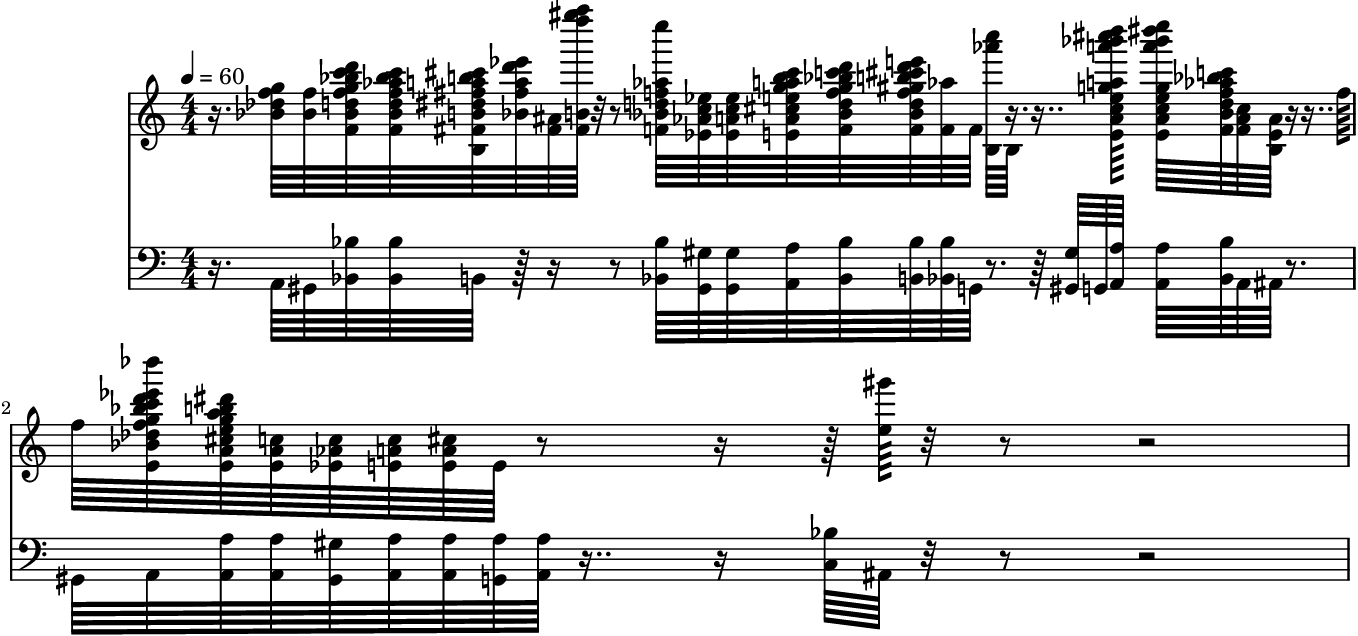

In [9]:
chain2 = chain.quantizePitch(step=1)
chain2

In [10]:
assert all(isinstance(ev.notes, list) for ev in chain if isinstance(ev, Chord))
assert all(isinstance(ev.notes, list) for ev in chain2 if isinstance(ev, Chord))


In [14]:
# Play with a bit of pedal

chain2.play(gain=0.2, instr='sin', fade=(0.01, 0.3), sustain=0.1)

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=206)
    Synth(‖ preset:sin=401.062 start=19.776 dur=.163 kpos=0.5 kgain=0.2 idataidx_=17 inumbps=3 ibplen=3 ichan=1 ifadein=0.01 ifadeout=0.0625 ipchintrp_=0 ifadekind=1 ktransp=0 klag=0.1 p17=0 p18=45 p19=0.359525 p20=0.0625 p21=45 …)
    Synth(‖ preset:sin=401.0621 start=19.776 dur=.163 kpos=0.5 kgain=0.2 idataidx_=17 inumbps=3 ibplen=3 ichan=1 ifadein=0.01 ifadeout=0.0625 ipchintrp_=0 ifadekind=1 ktransp=0 klag=0.1 p17=0 p18=70 p19=0.279663 p20=0.0625 p21=70 …)
    Synth(‖ preset:sin=401.0622 start=19.776 dur=.163 kpos=0.5 kgain=0.2 idataidx_=17 inumbps=3 ibplen=3 ichan=1 ifadein=0.01 ifadeout=0.0625 ipchintrp_=0 ifadekind=1 ktransp=0 klag=0.1 p17=0 p18=73 p19=0.122334 p20=0.0625 p21=73 …)
    Synth(‖ preset:sin=401.0623 start=19.776 dur=.163 kpos=0.5 kgain=0.2 idataidx_=17 inumbps=3 ibplen=3 ichan=1 ifadein=0.01 ifadeout=0.0625 ipchintrp_=0 ifadekind=1 ktransp=0 klag=0.1 p17=0 p18=77 p19=0.0462833 p20=0.0625 p21=77 …)
    Synth(‖ preset:sin=401.0624 start=19.776 dur=.163 kpos=0.5 kgain=0.2 idataidx_=17 inumbps=3 ibplen=3 ichan=1 ifadein=0.01 ifadeout=0.0625 ipchintrp_=0 ifadekind=1 ktransp=0 klag=0.1 p17=0 p18=79 p19=0.045897 p20=0.0625 p21=79 …)
    Synth(‖ preset:sin=401.0625 start=19.838 dur=.163 kpos=0.5 kgain=0.2 idataidx_=17 inumbps=3 ibplen=3 ichan=1 ifadein=0.01 ifadeout=0.0625 ipchintrp_=0 ifadekind=1 ktransp=0 klag=0.1 p17=0 p18=44 p19=0.243373 p20=0.0625 p21=44 …)
    Synth(‖ preset:sin=401.0626 start=19.838 dur=.163 kpos=0.5 kgain=0.2 idataidx_=17 inumbps=3 ibplen=3 ichan=1 ifadein=0.01 ifadeout=0.0625 ipchintrp_=0 ifadekind=1 ktransp=0 klag=0.1 p17=0 p18=70 p19=0.493828 p20=0.0625 p21=70 …)
    Synth(‖ preset:sin=401.0627 start=19.838 dur=.163 kpos=0.5 kgain=0.2 idataidx_=17 inumbps=3 ibplen=3 ichan=1 ifadein=0.01 ifadeout=0.0625 ipchintrp_=0 ifadekind=1 ktransp=0 klag=0.1 p17=0 p18=77 p19=0.138154 p20=0.0625 p21=77 …)
    Synth(‖ preset:sin=401.0628 start=19.901 dur=.163 kpos=0.5 kgain=0.2 idataidx_=17 inumbps=3 ibplen=3 ichan=1 ifadein=0.01 ifadeout=0.0625 ipchintrp_=0 ifadekind=1 ktransp=0 klag=0.1 p17=0 p18=46 p19=0.457089 p20=0.0625 p21=46 …)
    Synth(‖ preset:sin=401.0629 start=19.901 dur=.163 kpos=0.5 kgain=0.2 idataidx_=17 inumbps=3 ibplen=3 ichan=1 ifadein=0.01 ifadeout=0.0625 ipchintrp_=0 ifadekind=1 ktransp=0 klag=0.1 p17=0 p18=58 p19=0.633008 p20=0.0625 p21=58 …)
    Synth(‖ preset:sin=401.063 start=19.901 dur=.163 kpos=0.5 kgain=0.2 idataidx_=17 inumbps=3 ibplen=3 ichan=1 ifadein=0.01 ifadeout=0.0625 ipchintrp_=0 ifadekind=1 ktransp=0 klag=0.1 p17=0 p18=65 p19=0.720088 p20=0.0625 p21=65 …)
    Synth(‖ preset:sin=401.0631 start=19.901 dur=.163 kpos=0.5 kgain=0.2 idataidx_=17 inumbps=3 ibplen=3 ichan=1 ifadein=0.01 ifadeout=0.0625 ipchintrp_=0 ifadekind=1 ktransp=0 klag=0.1 p17=0 p18=70 p19=2.18045 p20=0.0625 p21=70 …)
    Synth(‖ preset:sin=401.0632 start=19.901 dur=.163 kpos=0.5 kgain=0.2 idataidx_=17 inumbps=3 ibplen=3 ichan=1 ifadein=0.01 ifadeout=0.0625 ipchintrp_=0 ifadekind=1 ktransp=0 klag=0.1 p17=0 p18=74 p19=1.08345 p20=0.0625 p21=74 …)
    Synth(‖ preset:sin=401.0633 start=19.901 dur=.163 kpos=0.5 kgain=0.2 idataidx_=17 inumbps=3 ibplen=3 ichan=1 ifadein=0.01 ifadeout=0.0625 ipchintrp_=0 ifadekind=1 ktransp=0 klag=0.1 p17=0 p18=77 p19=0.717353 p20=0.0625 p21=77 …)
    Synth(‖ preset:sin=401.0634 start=19.901 dur=.163 kpos=0.5 kgain=0.2 idataidx_=17 inumbps=3 ibplen=3 ichan=1 ifadein=0.01 ifadeout=0.0625 ipchintrp_=0 ifadekind=1 ktransp=0 klag=0.1 p17=0 p18=79 p19=0.42419 p20=0.0625 p21=79 …)
    Synth(‖ preset:sin=401.0635 start=19.901 dur=.163 kpos=0.5 kgain=0.2 idataidx_=17 inumbps=3 ibplen=3 ichan=1 ifadein=0.01 ifadeout=0.0625 ipchintrp_=0 ifadekind=1 ktransp=0 klag=0.1 p17=0 p18=82 p19=0.16261 p20=0.0625 p21=82 …)
    Synth(‖ preset:sin=401.0636 start=19.901 dur=.163 kpos=0.5 kgain=0.2 idataidx_=17 inumbps=3 ibplen=3 ichan=1 ifadein=0.01 ifadeout=0.0625 ipchintrp_=0 ifadekind=1 ktransp=0 klag=0.1 p17=0 p18=84 p19=0.0353183 p20=0.0625 p21=84 …)
    Synth(‖ preset:sin=40

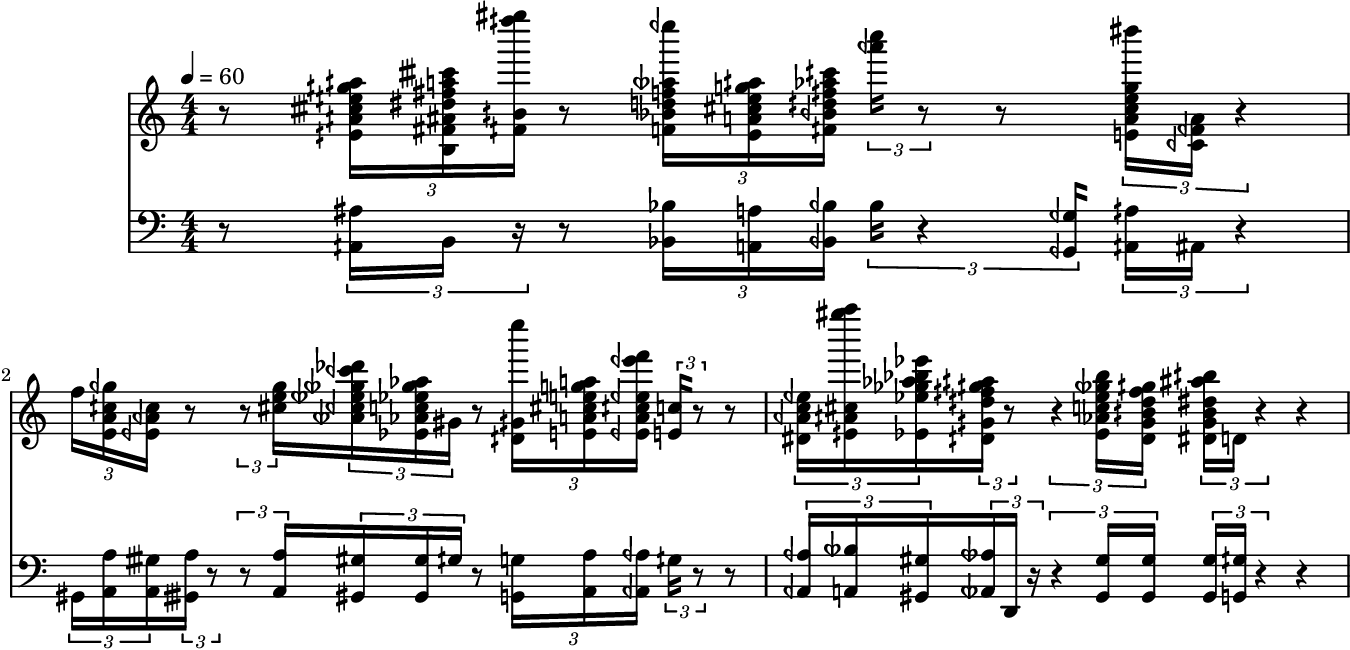

In [17]:
dt = 1/6
times = np.arange(0, cl.durSecs(), dt)
chords = [cl.chordAt(t, mindb=-55, dur=dt, maxcount=8, ampfactor=10, maxfreq=m2f(126), minfreq=40) or Rest(dt) for t in times]
chain3 = Chain(chords)
chain3 = chain3.quantizePitch(step=0.5)
chain3.show()

OfflineRenderer(sr=44100)
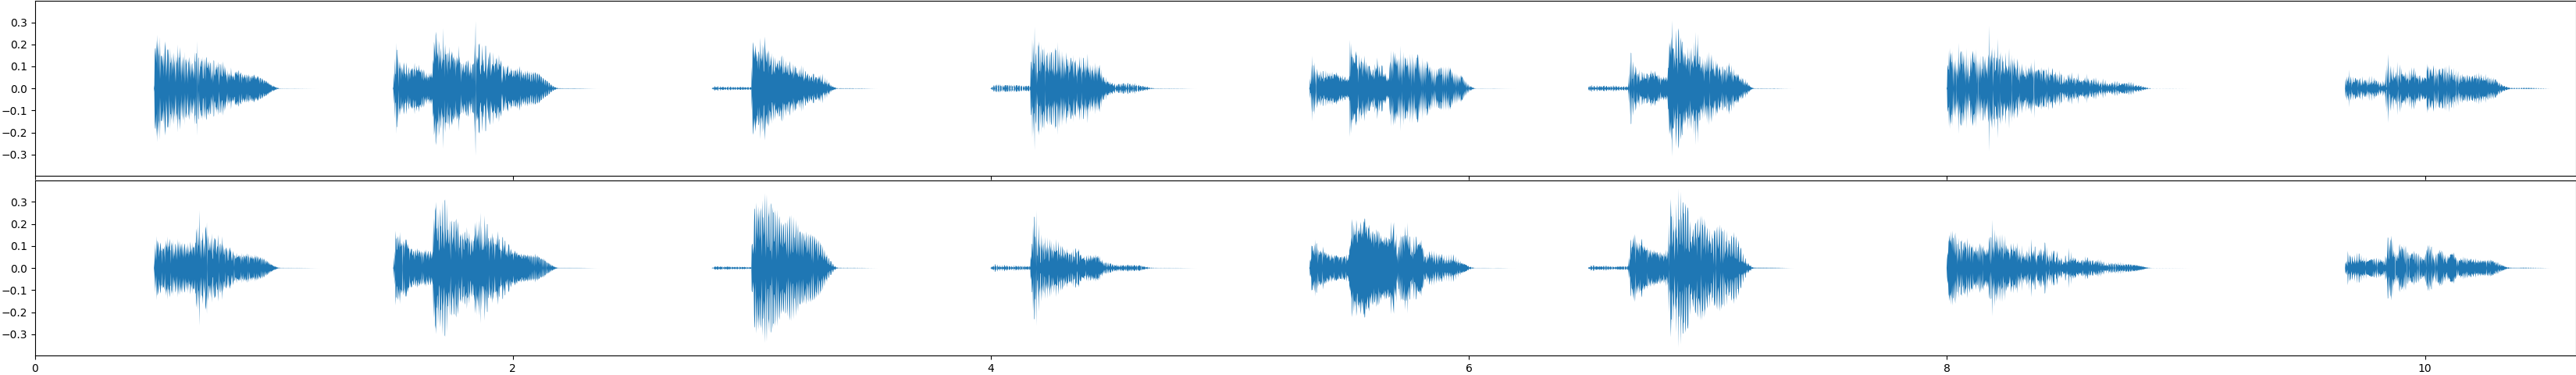

In [18]:
chain3.rec(gain=0.5, instr='.piano', fade=(0., 0.1), sustain=0.2)